# 1) DATA PREPROCESSING

In [5]:
# --- 📦 Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# --- 🧠 Step 1: Load Dataset ---
df = pd.read_csv("/content/online_gaming_behavior_dataset.csv")

# --- Step 2: Drop Irrelevant Columns ---
df.drop(columns=["PlayerID"], inplace=True)

# --- Step 3: Round Off PlayTimeHours ---
df["PlayTimeHours"] = df["PlayTimeHours"].round(0).astype(int)

# --- Step 4: Convert InGamePurchases to Categorical ---
df["InGamePurchases"] = df["InGamePurchases"].map({0: "No", 1: "Yes"})

# --- Step 5: Encode Categorical Columns ---
categorical_cols = ["Gender", "Location", "GameGenre",
                    "GameDifficulty", "EngagementLevel", "InGamePurchases"]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoders for later decoding

# --- Step 6: Handle Missing Values ---
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# --- Step 7: Scale Only Numeric Features ---
numeric_cols = ["Age", "PlayTimeHours", "SessionsPerWeek",
                "AvgSessionDurationMinutes", "PlayerLevel", "AchievementsUnlocked"]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --- Step 8: Create Visualization-Friendly Copy ---
# decode all categorical columns except EngagementLevel (target)
viz_cols = ["Gender", "Location", "GameGenre", "GameDifficulty", "InGamePurchases"]
df_viz = df.copy()

for col in viz_cols:
    if col in label_encoders:
        df_viz[col] = label_encoders[col].inverse_transform(df[col].astype(int))

print("✅ df_viz ready — labels restored except EngagementLevel.")

# --- Step 9: Define Features & Target ---
X = df.drop(columns=["EngagementLevel"])
y = df["EngagementLevel"]

# --- Step 10: Split into Train/Test Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- ✅ Step 11: Confirmation ---
print("✅ Data Preprocessing Complete!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print("\nFeatures Used:\n", list(X.columns))
print("\nNumeric Columns Scaled:\n", numeric_cols)
print("\nCategorical Columns Encoded:\n", categorical_cols)

✅ df_viz ready — labels restored except EngagementLevel.
✅ Data Preprocessing Complete!
Training set: (32027, 11), Test set: (8007, 11)

Features Used:
 ['Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours', 'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

Numeric Columns Scaled:
 ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

Categorical Columns Encoded:
 ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel', 'InGamePurchases']


/tmp/ipython-input-2512971632.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


# EXPLORATORY DATA ANALYSIS


Basic Dataset Overview:

                Age        Gender      Location     GameGenre  PlayTimeHours  \
count  4.003400e+04  40034.000000  40034.000000  40034.000000   4.003400e+04   
mean  -7.915823e-17      0.598466      1.695409      2.001049   6.877537e-17   
std    1.000012e+00      0.490215      1.189780      1.415431   1.000012e+00   
min   -1.691961e+00      0.000000      0.000000      0.000000  -1.736327e+00   
25%   -8.953939e-01      0.000000      1.000000      1.000000  -8.698803e-01   
50%    7.436599e-04      1.000000      1.000000      2.000000  -3.433985e-03   
75%    8.968812e-01      1.000000      3.000000      3.000000   8.630123e-01   
max    1.693448e+00      1.000000      3.000000      4.000000   1.729459e+00   

       InGamePurchases  GameDifficulty  SessionsPerWeek  \
count     40034.000000     40034.00000     4.003400e+04   
mean          0.200854         0.80007     1.515720e-16   
std           0.400644         0.87179     1.000012e+00   
min           0.00

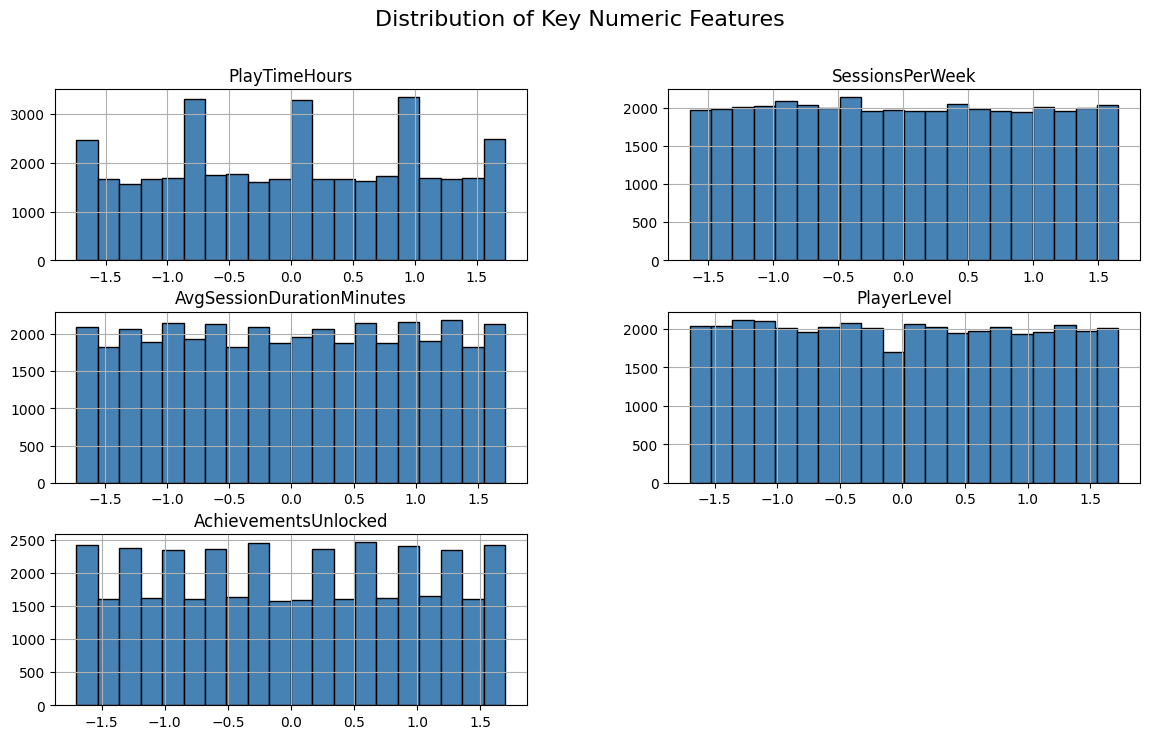

/tmp/ipython-input-3254450052.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_viz, x="GameGenre", y="PlayTimeHours", ci=None, palette="viridis")
/tmp/ipython-input-3254450052.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_viz, x="GameGenre", y="PlayTimeHours", ci=None, palette="viridis")


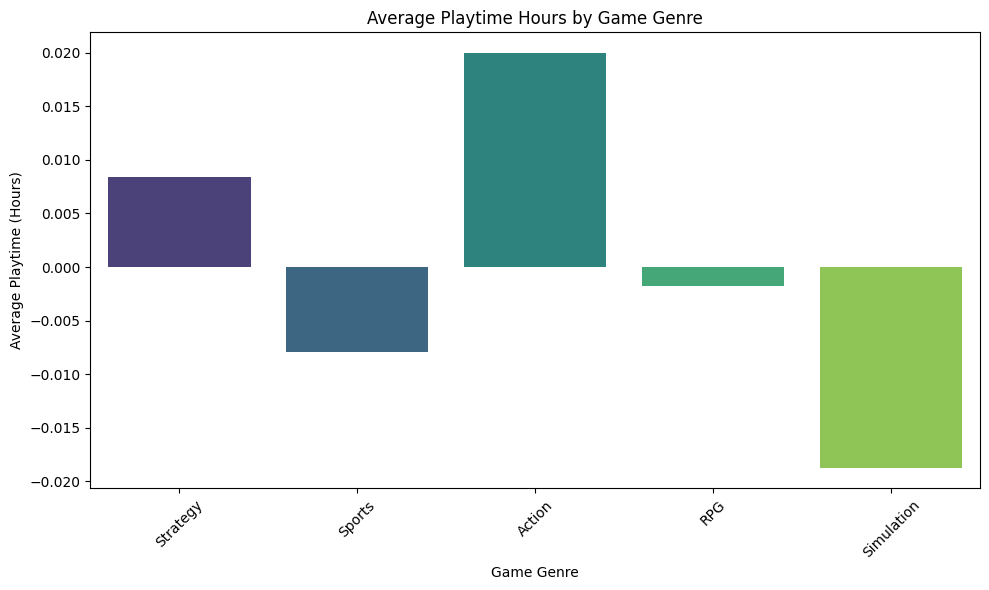

/tmp/ipython-input-3254450052.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viz, x="EngagementLevel", y="SessionsPerWeek", palette="coolwarm")


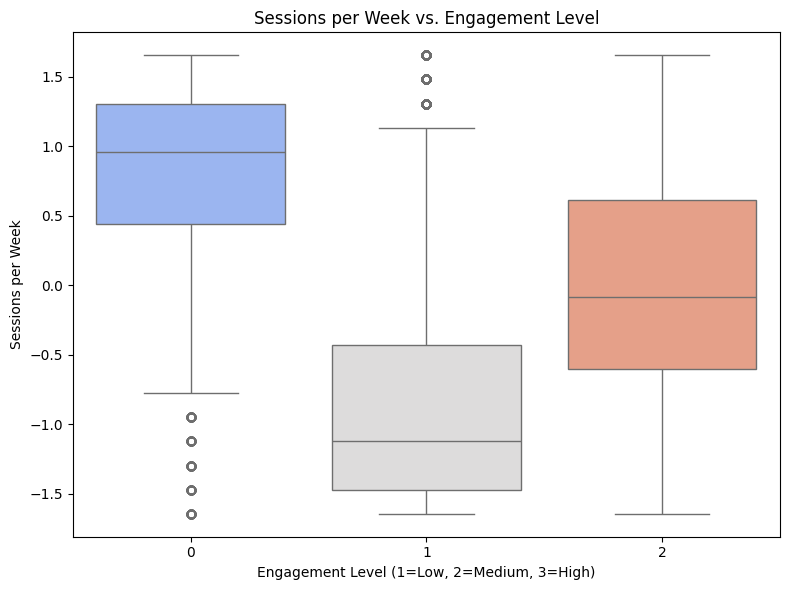

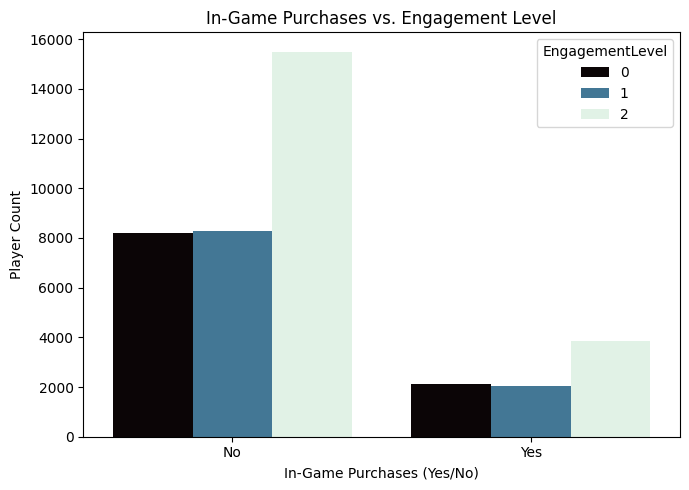

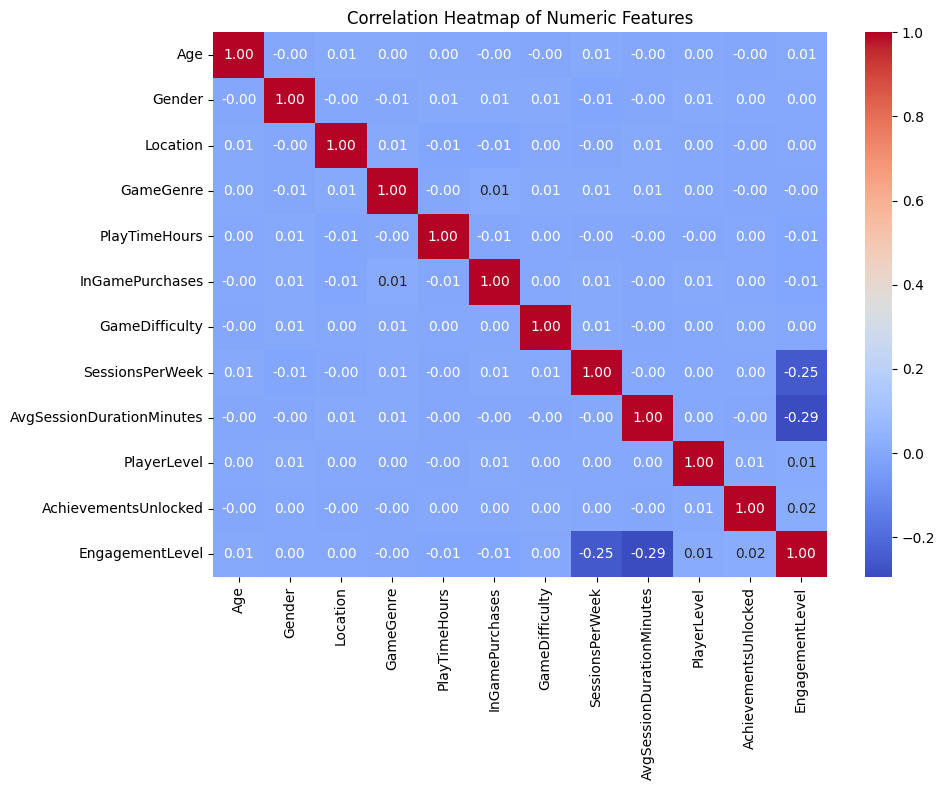


Average Playtime by In-Game Purchases:
   InGamePurchases  PlayTimeHours
0              No       0.002854
1             Yes      -0.011354

Top 5 Features Most Correlated with Engagement Level:

EngagementLevel         1.000000
AchievementsUnlocked    0.015576
PlayerLevel             0.013185
Age                     0.007433
Gender                  0.004110
Location                0.003457
Name: EngagementLevel, dtype: float64


In [7]:
# --- 1️⃣ Overview of Dataset ---
print("Basic Dataset Overview:\n")
print(df.describe(include='all'))

# --- 2️⃣ Distribution of Key Numeric Features ---
numeric_cols = ["PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes",
                "PlayerLevel", "AchievementsUnlocked"]

df_viz[numeric_cols].hist(bins=20, figsize=(14,8), color='steelblue', edgecolor='black')
plt.suptitle("Distribution of Key Numeric Features", fontsize=16)
plt.show()

# --- 3️⃣ Average Playtime by Game Genre ---
plt.figure(figsize=(10,6))
sns.barplot(data=df_viz, x="GameGenre", y="PlayTimeHours", ci=None, palette="viridis")
plt.title("Average Playtime Hours by Game Genre")
plt.xlabel("Game Genre")
plt.ylabel("Average Playtime (Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4️⃣ Sessions per Week vs. Engagement Level ---
plt.figure(figsize=(8,6))
sns.boxplot(data=df_viz, x="EngagementLevel", y="SessionsPerWeek", palette="coolwarm")
plt.title("Sessions per Week vs. Engagement Level")
plt.xlabel("Engagement Level (1=Low, 2=Medium, 3=High)")
plt.ylabel("Sessions per Week")
plt.tight_layout()
plt.show()

# --- 5️⃣ In-Game Purchases vs. Engagement Level ---
plt.figure(figsize=(7,5))
sns.countplot(data=df_viz, x="InGamePurchases", hue="EngagementLevel", palette="mako")
plt.title("In-Game Purchases vs. Engagement Level")
plt.xlabel("In-Game Purchases (Yes/No)")
plt.ylabel("Player Count")
plt.tight_layout()
plt.show()

# --- 6️⃣ Correlation Heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()



# --- 8️⃣ Average Playtime by Purchase Behavior ---
avg_playtime_purchase = df_viz.groupby("InGamePurchases")["PlayTimeHours"].mean().reset_index()
print("\nAverage Playtime by In-Game Purchases:\n", avg_playtime_purchase)

# --- 9️⃣ Top 5 Correlated Features with Engagement Level ---
corr_matrix = df.corr()
target_corr = corr_matrix["EngagementLevel"].sort_values(ascending=False)
print("\nTop 5 Features Most Correlated with Engagement Level:\n")
print(target_corr.head(6))

# MODEL DEVELOPMENT


🔹 Baseline Logistic Regression Performance:
Accuracy: 0.8188
Precision: 0.8200
Recall: 0.8188
F1-Score: 0.8174
ROC-AUC: 0.9129


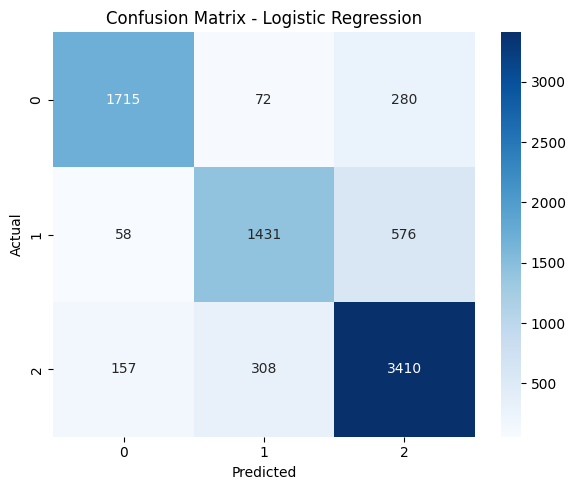

In [8]:
# --- 📦 Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# --- ⚙️ Step 1: Baseline Model (Logistic Regression) ---
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)

# Handle multiclass AUC
n_classes = len(y_test.unique())
y_test_bin = label_binarize(y_test, classes=range(n_classes))

log_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log, average='weighted'),
    "Recall": recall_score(y_test, y_pred_log, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_log, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test_bin, y_prob_log, multi_class='ovr')
}

print("\n🔹 Baseline Logistic Regression Performance:")
for k, v in log_metrics.items():
    print(f"{k}: {v:.4f}")

# --- Confusion Matrix (Baseline) ---
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


🔹 Random Forest Performance:
Accuracy: 0.9087
Precision: 0.9090
Recall: 0.9087
F1-Score: 0.9083
ROC-AUC: 0.9425


/tmp/ipython-input-2228592470.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")


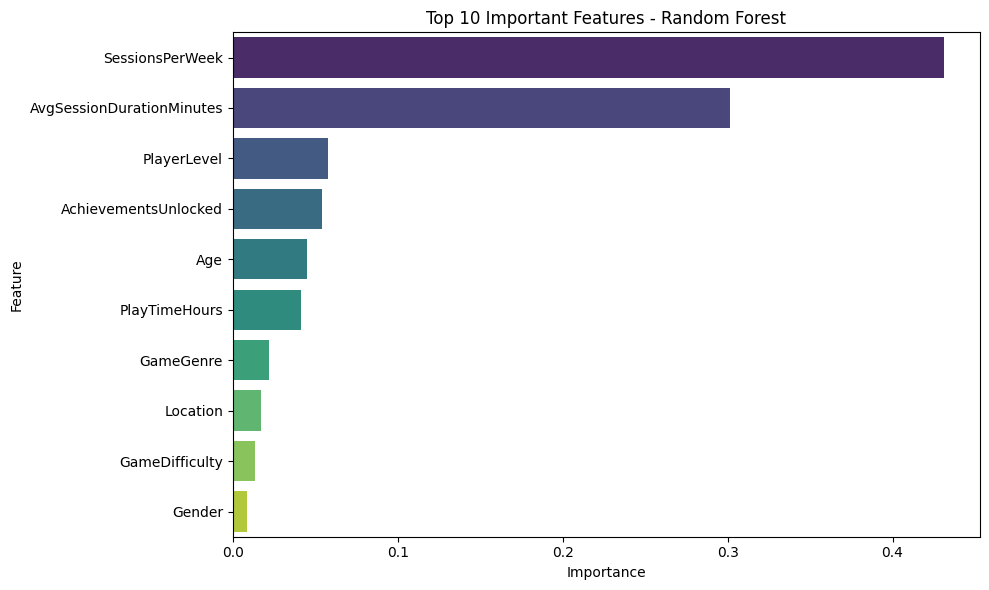

In [9]:
# --- 🚀 Step 2: Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted'),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_rf, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test_bin, y_prob_rf, multi_class='ovr')
}

print("\n🔹 Random Forest Performance:")
for k, v in rf_metrics.items():
    print(f"{k}: {v:.4f}")

# --- Feature Importance (Random Forest) ---
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features - Random Forest")
plt.tight_layout()
plt.show()

In [10]:
# --- ⚡ Step 3: Gradient Boosting Model ---
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)

gb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb, average='weighted'),
    "Recall": recall_score(y_test, y_pred_gb, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_gb, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test_bin, y_prob_gb, multi_class='ovr')
}

print("\n🔹 Gradient Boosting Performance:")
for k, v in gb_metrics.items():
    print(f"{k}: {v:.4f}")


🔹 Gradient Boosting Performance:
Accuracy: 0.9088
Precision: 0.9089
Recall: 0.9088
F1-Score: 0.9085
ROC-AUC: 0.9425


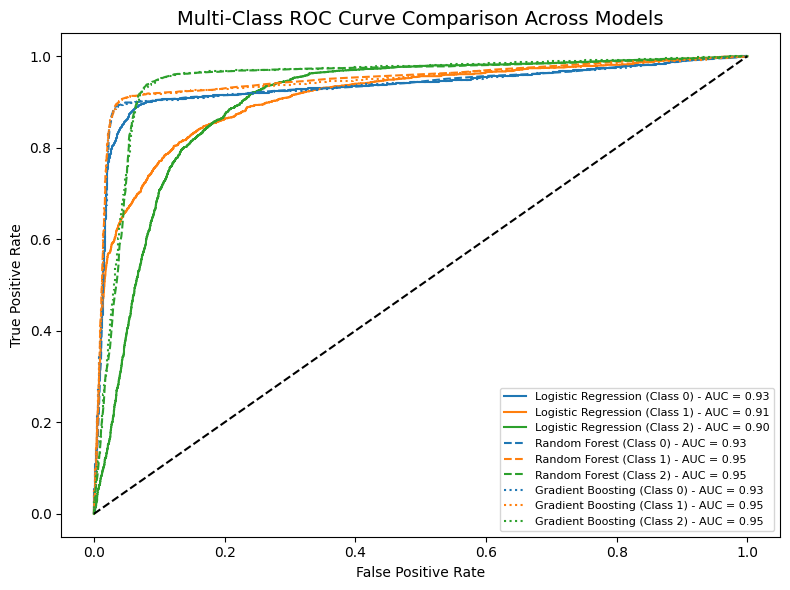

In [12]:
# --- 📈 Step 4: Multi-Class ROC Curve Comparison (Fixed Version) ---
from sklearn.metrics import roc_curve, auc
from itertools import cycle

plt.figure(figsize=(8,6))

# Define color palette for classes
colors = cycle(["#1f77b4", "#ff7f0e", "#2ca02c"])

# 1️⃣ Logistic Regression
y_prob_log = log_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"Logistic Regression (Class {i}) - AUC = {roc_auc[i]:.2f}")

# 2️⃣ Random Forest
y_prob_rf = rf_model.predict_proba(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], linestyle='--', color=color,
             label=f"Random Forest (Class {i}) - AUC = {roc_auc[i]:.2f}")

# 3️⃣ Gradient Boosting
y_prob_gb = gb_model.predict_proba(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_gb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], linestyle=':', color=color,
             label=f"Gradient Boosting (Class {i}) - AUC = {roc_auc[i]:.2f}")

# --- Final Plot Styling ---
plt.plot([0, 1], [0, 1], "k--", lw=1.5)
plt.title("Multi-Class ROC Curve Comparison Across Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

In [13]:
# --- 🧠 Step 5: Model Performance Comparison ---
comparison_df = pd.DataFrame([log_metrics, rf_metrics, gb_metrics],
                             index=["Logistic Regression", "Random Forest", "Gradient Boosting"])
print("\n📊 Model Performance Comparison:\n")
print(comparison_df)



📊 Model Performance Comparison:

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.818784   0.820020  0.818784  0.817382  0.912929
Random Forest        0.908705   0.908984  0.908705  0.908340  0.942494
Gradient Boosting    0.908830   0.908942  0.908830  0.908522  0.942492
